In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep
plt.style.use(hep.style.CMS)

KeyError: 'xaxis.labellocation is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

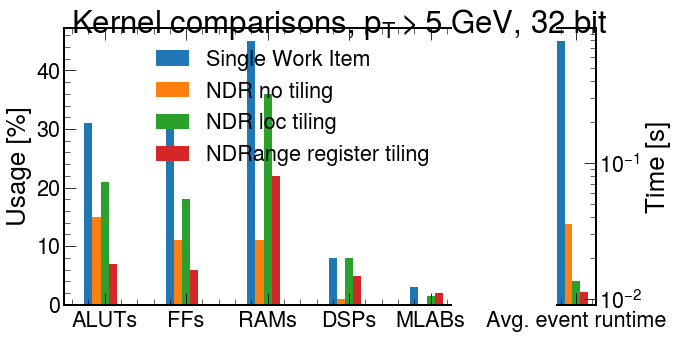

In [2]:
# resource usage component % per kernel type
resource = {}
resource['Single Work Item'] = {'ALUTs': 31,'FFs': 31,'RAMs': 45,'DSPs': 8,'MLABs': 3}
resource['NDR no tiling'] = {'ALUTs': 15,'FFs': 11,'RAMs': 11,'DSPs': 1,'MLABs': 0.002}
resource['NDR loc tiling'] = {'ALUTs': 21,'FFs': 18,'RAMs': 36,'DSPs': 8,'MLABs': 1.5}

resource['NDRange register tiling'] = {'ALUTs': 7,'FFs': 6,'RAMs': 22,'DSPs': 5,'MLABs': 2}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5),
                              gridspec_kw={'width_ratios': [10, 1]})

kruns = {'Single Work Item': 0.79918, 
         'NDR no tiling': 0.03582, 
         'NDR loc tiling': 0.01366,
         'NDRange register tiling': 0.01126}
R = list(resource.keys())
labels = list(resource[R[0]].keys())
vals = {}
runtimes = {}
for kernel_type in R:
    val = []
    for comp in labels:
        val.append(resource[kernel_type][comp])
    vals[kernel_type] = val
    runtimes[kernel_type] = kruns[kernel_type]
N = len(R)
x = np.arange(len(labels))
width = 0.1
for i in range(len(R)):
    kernel_type = R[i]
    ax1.bar(x - width / 2 * N + N * i * width / N, vals[kernel_type][:], width, label=kernel_type)
ax1.set_xticks(x)
ax1.set_xticklabels(labels)

#ax2 = ax1.twinx()
for i in range(len(R)):
    kernel_type = R[i]
    ax2.bar(x[-1] - width / 2 * N + N * i * width / N, runtimes[kernel_type], width, label=kernel_type)

ax2.set_xticks(x)
labels[-1] = 'Avg. event runtime'
ax2.set_xticklabels(labels)
ax1.set_xlim(-0.5,4.25)
ax2.set_xlim(3.75,4.25)

ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.yaxis.tick_left()
#ax1.tick_params(labelright='off')
ax2.yaxis.tick_right()

ax2.set_ylabel('Time [s]')
ax1.set_ylabel('Usage [%]')
ax1.legend(loc='upper right')
ax2.yaxis.set_label_position("right")
#plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
#plt.xlabel("common X")
plt.yscale('log')
fig.suptitle(r'Kernel comparisons, $p_T > 5$ GeV, 32 bit')
fig.align_xlabels()
plt.tight_layout()
plt.show()


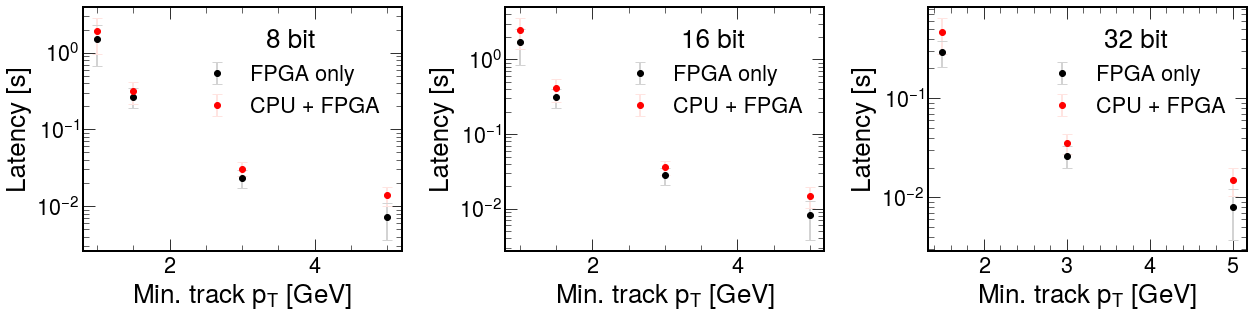

In [3]:
bitrange = ['8', '16', '32']

bits = {}

bits['8_avg_total'] = {'1': 1.90207e+06,
                       '1.5': 312947,
                       '3': 30851.7,
                       '5': 13894.5}
bits['8_var_total'] = {'1': 8.60669e+11,
                       '1.5': 1.01142e+10,
                       '3': 4.08714e+07,
                       '5': 1.47423e+07}
bits['8_avg_fpga'] = {'1': 1.48694e+06,
                      '1.5': 265454,
                      '3': 23390.8,
                      '5': 7259.54}
bits['8_var_fpga'] = {'1': 6.5115e+11,
                      '1.5': 5.91786e+09,
                      '3': 3.51412e+07,
                      '5': 1.30829e+07}

bits['16_avg_total'] = {'1': 2.47495e+06,
                        '1.5': 407927,
                        '3': 36176.2,
                        '5': 15005.1}
bits['16_var_total'] = {'1': 1.22567e+12,
                        '1.5': 1.98684e+10,
                        '3': 6.37895e+07,
                        '5': 2.17374e+07}
bits['16_avg_fpga'] = {'1': 1.68765e+06,
                       '1.5': 315517,
                       '3': 28043.1,
                       '5': 8289.44}
bits['16_var_fpga'] = {'1': 7.22745e+11,
                       '1.5': 8.17638e+09,
                       '3': 5.07354e+07,
                       '5': 1.97932e+07}

bits['32_avg_total'] = {'1': np.nan,
                        '1.5': 463440,
                        '3': 35792.6,
                        '5': 15084.2}
bits['32_var_total'] = {'1': np.nan,
                        '1.5': 3.28444e+10,
                        '3': 6.57585e+07,
                        '5': 2.18891e+07}
bits['32_avg_fpga'] = {'1': np.nan,
                       '1.5': 290235,
                       '3': 26158.5,
                       '5': 7968.99}
bits['32_var_fpga'] = {'1': np.nan,
                       '1.5': 7.15173e+09,
                       '3': 4.2296e+07,
                       '5': 1.78337e+07 }

plt.figure(figsize=(18,5))
for i in range(len(bitrange)):
    bit = bitrange[i]
    plt.subplot(1, 3, i + 1)
    pts = np.array(list(bits['{}_avg_fpga'.format(bit)].keys())).astype('float32')
    vals = np.array(list(bits['{}_avg_fpga'.format(bit)].values())).astype('float32') / 1e6
    err_vals = np.sqrt(np.array(list(bits['{}_var_fpga'.format(bit)].values())).astype('float32')) / 1e6
    plt.errorbar(pts, vals, yerr=err_vals, fmt='o', color='black',
                 ecolor='lightgray', elinewidth=2, capsize=5, label = 'FPGA only')

    pts = np.array(list(bits['{}_avg_total'.format(bit)].keys())).astype('float32')
    vals = np.array(list(bits['{}_avg_total'.format(bit)].values())).astype('float32') / 1e6
    err_vals = np.sqrt(np.array(list(bits['{}_var_total'.format(bit)].values())).astype('float32')) / 1e6
    plt.errorbar(pts, vals, yerr=err_vals, fmt='o', color='r',
                 ecolor='mistyrose', elinewidth=2,  capsize=5, label = 'CPU + FPGA')

    plt.xlabel(r'Min. track $p_T$ [GeV]')
    plt.ylabel('Latency [s]')
    plt.legend(title='{} bit'.format(bit))
    plt.yscale('log')
    #plt.xscale('log')
    #plt.title('{} bits'.format(bit))
plt.tight_layout()

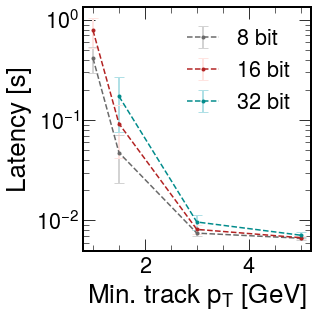

In [4]:
bitrange = ['8', '16', '32']

bits = {}

bits['8_avg_total'] = {'1': 1.90207e+06,
                       '1.5': 312947,
                       '3': 30851.7,
                       '5': 13894.5}
bits['8_var_total'] = {'1': 8.60669e+11,
                       '1.5': 1.01142e+10,
                       '3': 4.08714e+07,
                       '5': 1.47423e+07}
bits['8_avg_fpga'] = {'1': 1.48694e+06,
                      '1.5': 265454,
                      '3': 23390.8,
                      '5': 7259.54}
bits['8_var_fpga'] = {'1': 6.5115e+11,
                      '1.5': 5.91786e+09,
                      '3': 3.51412e+07,
                      '5': 1.30829e+07}

bits['16_avg_total'] = {'1': 2.47495e+06,
                        '1.5': 407927,
                        '3': 36176.2,
                        '5': 15005.1}
bits['16_var_total'] = {'1': 1.22567e+12,
                        '1.5': 1.98684e+10,
                        '3': 6.37895e+07,
                        '5': 2.17374e+07}
bits['16_avg_fpga'] = {'1': 1.68765e+06,
                       '1.5': 315517,
                       '3': 28043.1,
                       '5': 8289.44}
bits['16_var_fpga'] = {'1': 7.22745e+11,
                       '1.5': 8.17638e+09,
                       '3': 5.07354e+07,
                       '5': 1.97932e+07}

bits['32_avg_total'] = {'1': np.nan,
                        '1.5': 463440,
                        '3': 35792.6,
                        '5': 15084.2}
bits['32_var_total'] = {'1': np.nan,
                        '1.5': 3.28444e+10,
                        '3': 6.57585e+07,
                        '5': 2.18891e+07}
bits['32_avg_fpga'] = {'1': np.nan,
                       '1.5': 290235,
                       '3': 26158.5,
                       '5': 7968.99}
bits['32_var_fpga'] = {'1': np.nan,
                       '1.5': 7.15173e+09,
                       '3': 4.2296e+07,
                       '5': 1.78337e+07 }

colors = ['dimgrey', 'firebrick', 'darkcyan']
err_colors = ['lightgray', 'mistyrose', 'powderblue']
plt.figure(figsize=(5,5))
for i in range(len(bitrange)):
    bit = bitrange[i]
    color = colors[i]
    err_color = err_colors[i]
    #plt.subplot(1, 3, i + 1)
    fpga_pts = np.array(list(bits['{}_avg_fpga'.format(bit)].keys())).astype('float32')
    fpga_vals = np.array(list(bits['{}_avg_fpga'.format(bit)].values())).astype('float32') / 1e6
    
    total_pts = np.array(list(bits['{}_avg_total'.format(bit)].keys())).astype('float32')
    total_vals = np.array(list(bits['{}_avg_total'.format(bit)].values())).astype('float32') / 1e6
    
    
    fpga_err_vals = np.sqrt(np.array(list(bits['{}_var_fpga'.format(bit)].values())).astype('float32')) / 1e6
    total_err_vals = np.sqrt(np.array(list(bits['{}_var_total'.format(bit)].values())).astype('float32')) / 1e6
    
    plt.errorbar(total_pts, total_vals - fpga_vals, yerr=total_err_vals - fpga_err_vals, fmt='.--', color=color,
                 ecolor=err_color, elinewidth=2, capsize=5, label = '{} bit'.format(bit))

    plt.xlabel(r'Min. track $p_T$ [GeV]')
    plt.ylabel('Latency [s]')
    plt.legend()
    plt.yscale('log')
    #plt.xscale('log')
plt.tight_layout()

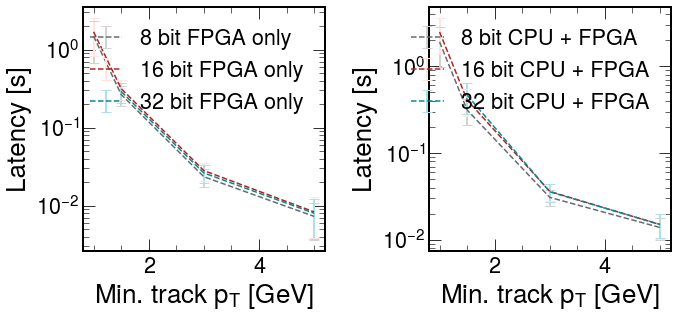

In [5]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

for i in range(len(bitrange)):
    bit = bitrange[i]
    color = colors[i]
    err_color = err_colors[i]
    pts = np.array(list(bits['{}_avg_fpga'.format(bit)].keys())).astype('float32')
    vals = np.array(list(bits['{}_avg_fpga'.format(bit)].values())).astype('float32') / 1e6
    err_vals = np.sqrt(np.array(list(bits['{}_var_fpga'.format(bit)].values())).astype('float32')) / 1e6
    plt.errorbar(pts, vals, yerr=err_vals, fmt='--', color=color,
                 ecolor=err_color, elinewidth=2, capsize=5, label = '{} bit FPGA only'.format(bit))

plt.xlabel(r'Min. track $p_{T}$ [GeV]')
plt.ylabel('Latency [s]')
plt.legend()
plt.yscale('log')

plt.subplot(1,2,2)
for i in range(len(bitrange)):
    bit = bitrange[i]
    color = colors[i]
    err_color = err_colors[i]
    pts = np.array(list(bits['{}_avg_total'.format(bit)].keys())).astype('float32')
    vals = np.array(list(bits['{}_avg_total'.format(bit)].values())).astype('float32') / 1e6
    err_vals = np.sqrt(np.array(list(bits['{}_var_total'.format(bit)].values())).astype('float32')) / 1e6
    plt.errorbar(pts, vals, yerr=err_vals, fmt='--', color=color,
                 ecolor=err_color, elinewidth=2, capsize=5, label = '{} bit CPU + FPGA'.format(bit))

plt.xlabel(r'Min. track $p_T$ [GeV]')
plt.ylabel('Latency [s]')
plt.legend(loc='upper right')
plt.yscale('log')
plt.tight_layout()
plt.show()

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


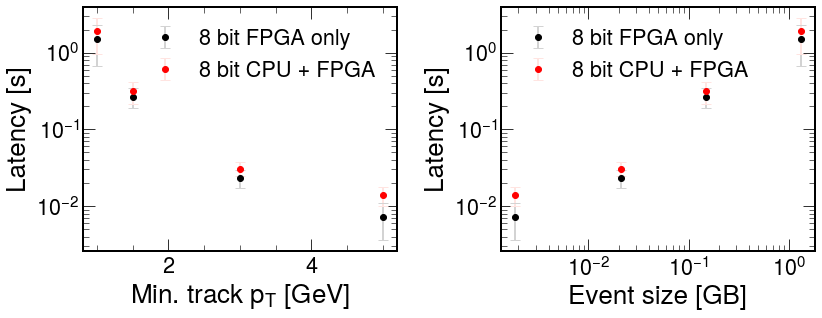

In [7]:
# plot data size vs execution times, 8 bits >> data size corresponds to pt cut

bit = '8'

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)

pts = np.array(list(bits['{}_avg_fpga'.format(bit)].keys())).astype('float32')
vals = np.array(list(bits['{}_avg_fpga'.format(bit)].values())).astype('float32') / 1e6
err_vals = np.sqrt(np.array(list(bits['{}_var_fpga'.format(bit)].values())).astype('float32')) / 1e6
plt.errorbar(pts, vals, yerr=err_vals, fmt='o', color='black',
             ecolor='lightgray', elinewidth=2, capsize=5, label = '{} bit FPGA only'.format(bit))

pts = np.array(list(bits['{}_avg_total'.format(bit)].keys())).astype('float32')
vals = np.array(list(bits['{}_avg_total'.format(bit)].values())).astype('float32') / 1e6
err_vals = np.sqrt(np.array(list(bits['{}_var_total'.format(bit)].values())).astype('float32')) / 1e6
plt.errorbar(pts, vals, yerr=err_vals, fmt='o', color='r',
             ecolor='mistyrose', elinewidth=2, capsize=5, label = '{} bit CPU + FPGA'.format(bit))

plt.xlabel(r'Min. track $p_T$ [GeV]')
plt.ylabel('Latency [s]')
plt.legend()
plt.yscale('log')
#plt.title('Runtime scalability according to Pt cut')


pt_sizes = [353 / 267, 149 / 1000, 2.1 / 100, 0.184 / 100] #1, 1.5, 3, 5
#plt.figure(figsize=(5,5))

plt.subplot(1,2,2)

pts = pt_sizes#np.array(list(bits['{}_avg_fpga'.format(bit)].keys())).astype('float32')
vals = np.array(list(bits['{}_avg_fpga'.format(bit)].values())).astype('float32') / 1e6
err_vals = np.sqrt(np.array(list(bits['{}_var_fpga'.format(bit)].values())).astype('float32')) / 1e6
plt.errorbar(pts, vals, yerr=err_vals, fmt='o', color='black',
             ecolor='lightgray', elinewidth=2, capsize=5, label = '{} bit FPGA only'.format(bit))

pts = pt_sizes#pts = np.array(list(bits['{}_avg_total'.format(bit)].keys())).astype('float32')
vals = np.array(list(bits['{}_avg_total'.format(bit)].values())).astype('float32') / 1e6
err_vals = np.sqrt(np.array(list(bits['{}_var_total'.format(bit)].values())).astype('float32')) / 1e6
plt.errorbar(pts, vals, yerr=err_vals, fmt='o', color='r',
             ecolor='mistyrose', elinewidth=2, capsize=5, label = '{} bit CPU + FPGA'.format(bit))

plt.xlabel('Event size [GB]')
plt.ylabel('Latency [s]')
plt.legend(loc='upper left')
plt.yscale('log')
plt.xscale('log')
#plt.title('Runtime scalability according to event graph size')
plt.tight_layout()
plt.savefig('scalability_study.pdf')
plt.show()

In [7]:
# plot # of nodes vs execution times, 8 bits >> # nodes corresponds to pt cut
# plot # of segments vs execution times, 8 bits >> # segments corresponds to pt cut

In [8]:
# plot of transfer data overhead (total - fpga) vs bits

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


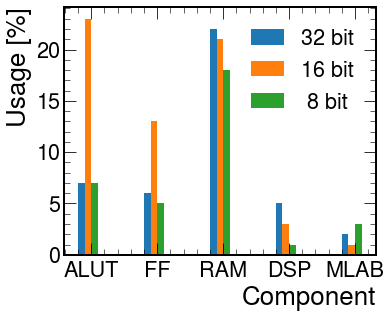

In [10]:
# resource usage component % vs bits
resource = {}
resource['32 bit'] = {'ALUT': 7,'FF': 6,'RAM': 22,'DSP': 5,'MLAB': 2}
resource['16 bit'] = {'ALUT': 23,'FF': 13,'RAM': 21,'DSP': 3,'MLAB': 1} # change
resource[' 8 bit'] = {'ALUT': 7,'FF': 5,'RAM': 18,'DSP': 1,'MLAB': 3}

fig, ax1 = plt.subplots(figsize=(6,5))

R = list(resource.keys())
labels = list(resource[R[0]].keys())
vals = {}
mlabs = {}
for kernel_type in R:
    val = []
    for comp in labels:
        val.append(resource[kernel_type][comp])
    vals[kernel_type] = val
N = len(R)
x = np.arange(len(labels))
width = 0.1
for i in range(len(R)):
    kernel_type = R[i]
    ax1.bar(x - width / 2 * N + N * i * width / N, vals[kernel_type][:], width, label=kernel_type)
ax1.set_xticks(x)
ax1.set_xticklabels(labels)

ax1.set_xlabel('Component')
ax1.set_ylabel('Usage [%]')
ax1.legend(loc='upper right')
#plt.title('System Area Analysis')
#plt.yscale("log")
#plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
#plt.xlabel("common X")
plt.tight_layout()
plt.savefig('resource_bit_precision_ocl.pdf')
plt.show()